In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#from elm import ELM
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import classification_report
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('Binary_KDD.csv', header=0)
df=df.dropna()
array = df.values
x = array[:,0:35]
y = array[:,35]
x_test = x
y_test = y
n_classes=2

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3)

# RALOG

In [4]:
SEED = 222

In [5]:
#Defining the models to be stacked.....THIS IS A NEW ENSEMBLE CALLED MAXE...the 1st of its kind...this is our contribution
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=100, max_features=25)
clf3 = GaussianNB()
lr = LogisticRegression()
xb=XGBClassifier()
dt=DecisionTreeClassifier()
et = ExtraTreesClassifier()
nn = MLPClassifier((100, 10), early_stopping=False, random_state=SEED)
gbm=GradientBoostingClassifier()
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())
sclf = StackingClassifier(classifiers=[nn, et,xb],meta_classifier=ada_clf)

In [6]:
import time
start = time.time() # Measuring the processing time
y_score=sclf.fit(x_train, y_train)
end = time.time()
print(end - start)

92.38747191429138


In [7]:
pred = sclf.predict(x_test)
y_pred_sclf = sclf.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_sclf,y_test)
print(cm)

[[17682     5]
 [   49 20056]]


In [9]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['Normal','Attack'])
    df_cm2.columns=['Normal','Attack']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

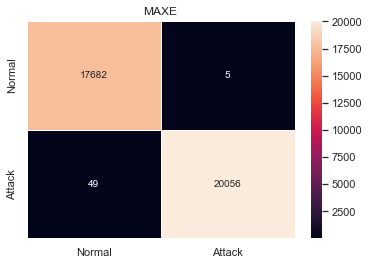

In [10]:
plot_heatmap(confusion_matrix(y_pred_sclf,y_test),'MAXE')

In [11]:
print(classification_report(y_pred_sclf,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9972    0.9997    0.9985     17687
         1.0     0.9998    0.9976    0.9987     20105

    accuracy                         0.9986     37792
   macro avg     0.9985    0.9986    0.9986     37792
weighted avg     0.9986    0.9986    0.9986     37792



In [12]:
acc=accuracy_score(y_test,y_pred_sclf)
print("\nAccuracy: %.4f" % acc )


Accuracy: 0.9986


# GradientBoostingClassifier

In [20]:
gbc = GradientBoostingClassifier()

In [21]:
import time
start = time.time() # Measuring the processing time
y_score=gbc.fit(x_train, y_train)
end = time.time()
print(end - start)

16.599892139434814


In [22]:
pred1 = gbc.predict(x_test)
y_pred_gbc = gbc.predict(x_test)

In [23]:
cm=confusion_matrix(pred1,y_test)
print(cm)

[[17635    49]
 [   96 20012]]


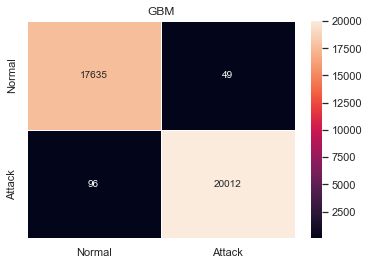

In [24]:
plot_heatmap(confusion_matrix(pred1,y_test),'GBM')

In [25]:
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9962


In [26]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9946    0.9972    0.9959     17684
         1.0     0.9976    0.9952    0.9964     20108

    accuracy                         0.9962     37792
   macro avg     0.9961    0.9962    0.9961     37792
weighted avg     0.9962    0.9962    0.9962     37792



# AdaBoostClassifier

In [27]:
abc = AdaBoostClassifier()
#print('Accuracy of AdaBoostClassifier classifier on test set: {:.2f}'
#     .format(abc.score(x_test, y_test)))

In [28]:
import time
start = time.time() # Measuring the processing time
y_score=abc.fit(x_train, y_train)
end = time.time()
print(end - start)

4.515758514404297


In [29]:
pred1 = abc.predict(x_test)
y_pred_abc = abc.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[17371   177]
 [  360 19884]]


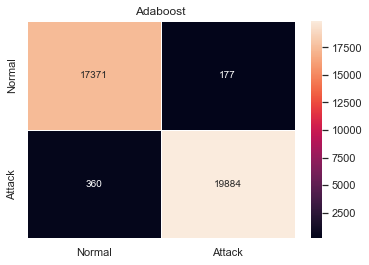

In [31]:
plot_heatmap(confusion_matrix(pred1,y_test),'Adaboost')

In [32]:
from sklearn.metrics import accuracy_score
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9858


In [33]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9797    0.9899    0.9848     17548
         1.0     0.9912    0.9822    0.9867     20244

    accuracy                         0.9858     37792
   macro avg     0.9854    0.9861    0.9857     37792
weighted avg     0.9858    0.9858    0.9858     37792



# ExtraTrees

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10, max_features=25)

In [35]:
start = time.time() # Measuring the processing time
y_score=etc.fit(x_train, y_train)
end = time.time()
print(end - start)

0.9551064968109131


In [36]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[17371   177]
 [  360 19884]]


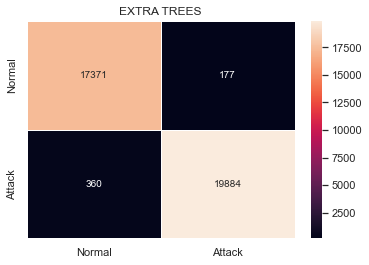

In [38]:
plot_heatmap(confusion_matrix(pred1,y_test),'EXTRA TREES')

In [39]:
from sklearn.metrics import accuracy_score
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9858


In [40]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9797    0.9899    0.9848     17548
         1.0     0.9912    0.9822    0.9867     20244

    accuracy                         0.9858     37792
   macro avg     0.9854    0.9861    0.9857     37792
weighted avg     0.9858    0.9858    0.9858     37792



# Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bc = BaggingClassifier()

In [43]:
start = time.time() # Measuring the processing time
y_score=bc.fit(x_train, y_train)
end = time.time()
print(end - start)

2.5897300243377686


In [44]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[17371   177]
 [  360 19884]]


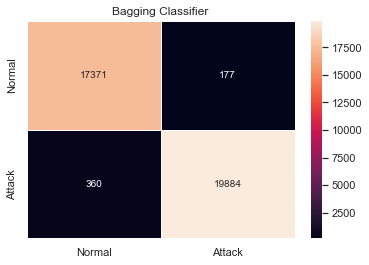

In [46]:
plot_heatmap(confusion_matrix(pred1,y_test),'Bagging Classifier')

In [47]:
from sklearn.metrics import accuracy_score
start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
end = time.time()
print(end - start)


Accuracy: 0.9858
0.0


In [48]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9797    0.9899    0.9848     17548
         1.0     0.9912    0.9822    0.9867     20244

    accuracy                         0.9858     37792
   macro avg     0.9854    0.9861    0.9857     37792
weighted avg     0.9858    0.9858    0.9858     37792



In [49]:
xg = XGBClassifier()

In [50]:
start = time.time() # Measuring the processing time
y_score=xg.fit(x_train, y_train)
end = time.time()
print(end - start)

4.009639263153076


In [51]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [52]:
cm=confusion_matrix(pred1,y_test)
print(cm)

[[17371   177]
 [  360 19884]]


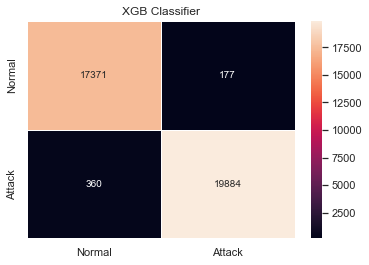

In [53]:
plot_heatmap(confusion_matrix(pred1,y_test),'XGB Classifier')

In [54]:
start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
end = time.time()
print(end - start)


Accuracy: 0.9858
0.0


In [55]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9797    0.9899    0.9848     17548
         1.0     0.9912    0.9822    0.9867     20244

    accuracy                         0.9858     37792
   macro avg     0.9854    0.9861    0.9857     37792
weighted avg     0.9858    0.9858    0.9858     37792

